In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
np.random.seed(41)

In [3]:
train, test = train_test_split(pd.read_csv("train_test_set2.csv"))

In [8]:
train.shape, test.shape

((27342, 29), (9115, 29))

In [20]:
trees = XGBRegressor(n_estimators=1000, random_state=41)

In [21]:
trees

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             random_state=41, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [43]:
test.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'NORM_SUM',
       'LOG_SUM', 'NORM_MEAN', 'LOG_MEAN', 'MIN_MAX_LOG_SUM',
       'MIN_MAX_LOG_MEAN', 'MIN_MAX_NORM_SUM', 'MIN_MAX_NORM_MEAN',
       'MIN_MAX_SUM', 'MIN_MAX_MEAN'],
      dtype='object')

In [51]:
target = "MIN_MAX_MEAN"

In [52]:
predictors = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "FLAG_MOBIL",
    "FLAG_WORK_PHONE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS"
]
trees.fit(X=pd.get_dummies(train[predictors]), y=train[target])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=41,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
predictions = trees.predict(pd.get_dummies(test[predictors]))

In [54]:
(predictions - test[target]).abs().mean()

3.611124315158086

In [55]:
(test[target].mean() - test[target]).abs().mean()

3.265634643655981

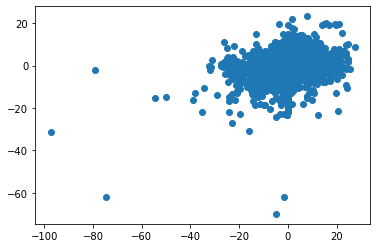

In [56]:
_=plt.scatter(test[target], predictions)

In [65]:
from xgboost import XGBClassifier
train, test = train_test_split(pd.read_csv("cred_record_train_test.csv"))

In [66]:
train.shape

(583286, 21)

In [67]:
test.shape

(194429, 21)

In [78]:
(test.STATUS.value_counts() / test.shape[0]).max()

0.4233781997541519

In [95]:
status_codes = {
    "C": 1,
    "X": 0,
    "0": -1,
    "1": -2,
    "2": -3,
    "3": -4,
    "4": -5,
    "5": -6
}
train["STATUS"].replace(status_codes, inplace=True)
test["STATUS"].replace(status_codes, inplace=True)

In [107]:
ensembles = list()
accuracies = pd.Series(index=np.arange(-6, 2))
for status in accuracies.index:
    X = pd.get_dummies(train[predictors])
    y = train.STATUS == status
    classer = XGBClassifier(n_estimators=5)
    classer.fit(X=X, y=y)
    ensembles.append(classer)
    preds = classer.predict(pd.get_dummies(test[predictors]))
    accuracies[status] = ((preds == (test.STATUS == status)).mean())

In [108]:
accuracies

-6    0.998035
-5    0.999702
-4    0.999686
-3    0.998997
-2    0.988155
-1    0.633563
 0    0.815187
 1    0.590385
dtype: float64

In [1]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

In [2]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data,
               boston.target,
               target_name='price',
               feature_names=boston.feature_names)
              
viz.view()    

Format: "svg" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tsvg', '-o', 'C:\\Users\\brian\\AppData\\Local\\Temp\\DTreeViz_9180.svg', 'C:/Users/brian/AppData/Local/Temp\\DTreeViz_9180']' returned non-zero exit status 1. [stderr: b'Format: "svg" not recognized. Use one of:\r\n']